The following code will be used to fit a linear regression model on 1 dimensional data.
The model has two parameters, 1) w1 = slope and w0 = intercept. Equations derived in the class will be used to determine the optimal values of these parameters.


Following steps will be performed:
1. Import important python libraries
2. Read data File
3. Visualize data
4. Visualize any arbitrary model
5. Compute MSE associated with arbitrary model
6. Compute parameters of optimal model
7. Visualize optimal model and associated errors
8. Make prediction for new data

A question needs to be answered in the end.

### 1. Import Python libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

---

### 2. Read Data File

In [2]:
!gdown 1zx8FpL-xz8oXRSf_bUmHJbbSY5cjbKcR

Downloading...
From: https://drive.google.com/uc?id=1zx8FpL-xz8oXRSf_bUmHJbbSY5cjbKcR
To: /content/LR_1D_data.csv
100% 3.78k/3.78k [00:00<00:00, 21.3MB/s]


In [3]:
data = pd.read_csv('LR_1D_data.csv')

In [4]:
data

,y,x
0,6.070736,-1.00
1,9.120318,-0.95
2,4.725397,-0.90
3,9.267612,-0.85
4,8.020143,-0.80
...,...,...
95,-10.355203,3.75
96,-4.428707,3.80
97,-6.005354,3.85
98,-7.609459,3.90


---

### 3. Visualize data

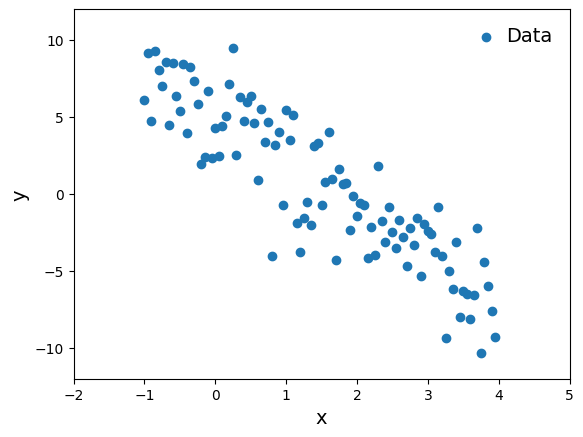

In [5]:
plt.scatter(data['x'], data['y'], label='Data')
plt.xlabel('x', fontsize=14)
plt.ylabel('y', fontsize=14)
plt.xlim(-2,5)
plt.ylim(-12,12)
plt.legend(frameon=False, handletextpad=0, fontsize=14)

---

### 4. Arbitrary model

In [6]:
def lr_1d_model(w_cap_vec, x_vec = data['x']):
    w0_cap = w_cap_vec[0]
    w1_cap = w_cap_vec[1]

    # Model prediction
    pred = x_vec * w1_cap + w0_cap
    return pred

In [7]:
w_cap_arb_vec = [6, -2]
y_cap_arb_vec = lr_1d_model(w_cap_arb_vec) # x_vec is set as default value in function

In [8]:
len(y_cap_arb_vec)

100

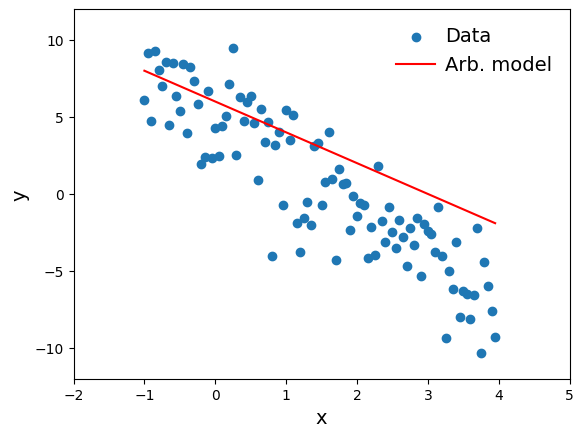

In [9]:
plt.scatter(data['x'], data['y'], label='Data')
plt.xlabel('x', fontsize=14)
plt.ylabel('y', fontsize=14)
plt.xlim(-2,5)
plt.ylim(-12,12)

plt.plot(data['x'], y_cap_arb_vec, c='r', label='Arb. model')
plt.legend(frameon=False, handletextpad=0.5, fontsize=14)

---

### 5. Compute MSE of arbitrary model

In [10]:
error = data['y'] - y_cap_arb_vec
error

0    -1.929264
1     1.220318
2    -3.074603
3     1.567612
4     0.420143
        ...   
95   -8.855203
96   -2.828707
97   -4.305354
98   -5.809459
99   -7.404869
Length: 100, dtype: float64

In [11]:
mse = np.mean(np.square(error))
print("Mean square error (MSE): %.2f units" %mse)

Mean square error (MSE): 13.36 units


---

### 6. Compute params of optimal model

In [12]:
y_avg = np.mean(data['y'])
x_avg = np.mean(data['x'])

In [13]:
w1_cap_num = np.sum((data['y'] - y_avg) * (data['x'] - x_avg))
w1_cap_den = np.sum((data['x'] - x_avg) ** 2)
w1_cap = w1_cap_num/w1_cap_den
w1_cap

-3.0316709962204405

In [14]:
w0_cap = y_avg - w1_cap * x_avg
w0_cap

5.049697882260526

In [15]:
print("Optimal model parameters are:")
print("w0_cap: %.3f" %w0_cap)
print("w1_cap: %.3f" %w1_cap)

Optimal model parameters are:
w0_cap: 5.050
w1_cap: -3.032


---

### 7. Visualize optimal model

In [16]:
w_cap_vec = [w0_cap, w1_cap]
y_cap_vec = lr_1d_model(w_cap_vec)

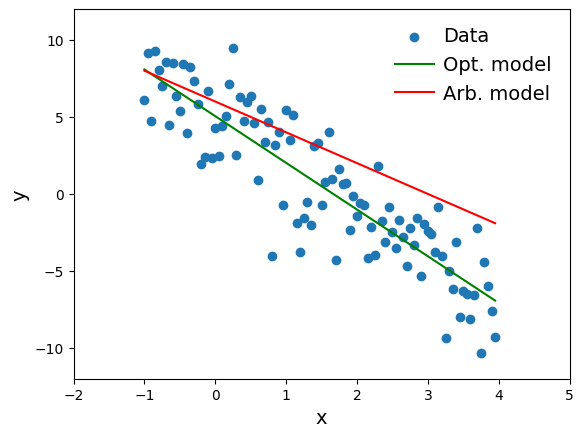

In [17]:
plt.scatter(data['x'], data['y'], label='Data')
plt.xlabel('x', fontsize=14)
plt.ylabel('y', fontsize=14)
plt.xlim(-2,5)
plt.ylim(-12,12)

plt.plot(data['x'], y_cap_vec, c='g', label='Opt. model')
plt.plot(data['x'], y_cap_arb_vec, c='r', label='Arb. model')

plt.legend(frameon=False, handletextpad=0.5, fontsize=14)

In [18]:
error = data['y'] - y_cap_vec
mse = np.mean(np.square(error))
print("Mean square error (MSE): %.2f units" %mse)

Mean square error (MSE): 5.03 units


---

### 8. Make prediction for new data

In [19]:
new_x_vec = np.array([-1.8,-1.4,4.3,4.6])

In [20]:
new_y_cap_pred_vec = lr_1d_model(w_cap_vec=w_cap_vec, x_vec=new_x_vec)

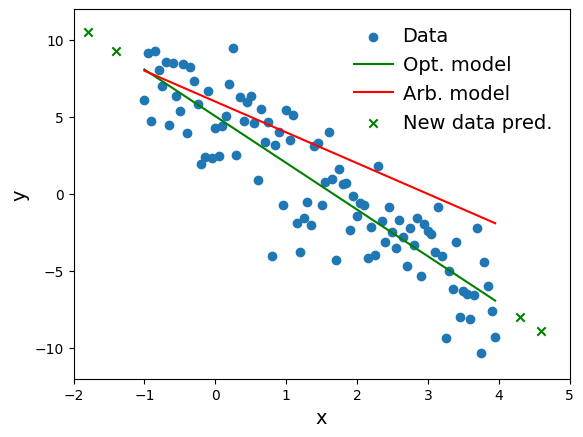

In [21]:
plt.scatter(data['x'], data['y'], label='Data')
plt.xlabel('x', fontsize=14)
plt.ylabel('y', fontsize=14)
plt.xlim(-2,5)
plt.ylim(-12,12)

plt.plot(data['x'], y_cap_vec, c='g', label='Opt. model')
plt.plot(data['x'], y_cap_arb_vec, c='r', label='Arb. model')
plt.scatter(new_x_vec, new_y_cap_pred_vec, c='g', marker='x', label='New data pred.')

plt.legend(frameon=False, handletextpad=0.5, fontsize=14)

---

### Question

Plot mean square error (MSE) for various values of w_vec (use the code associated with arbitrary model). It will be a 3-D plot with MSE on z-axis, w0_vec on x-axis and w1_vec on y-axis. Does the MSE plot have multiple minimas? Discuss.


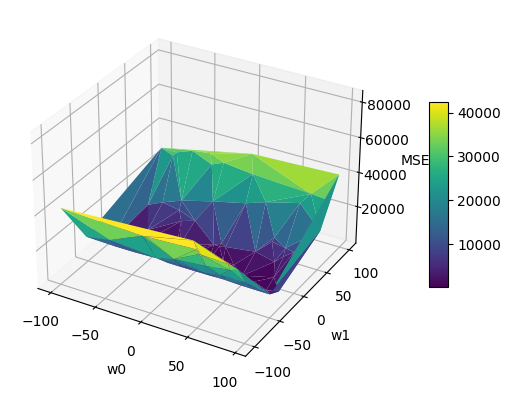

In [22]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

# Generate linearly spaced w values
w0_tut = np.linspace(-10, 10, 100)
w1_tut = np.linspace(-10, 10, 100)
w0_tut = w0_tut + np.random.uniform(-100, 100, len(w0_tut))
w1_tut = w1_tut + np.random.uniform(-100, 100, len(w1_tut))

# Calculate MSE
mse = []
for i in range(100):
  for j in range(100):
      # w = (w0_tut[i], w1_tut[j])
      w = [w0_tut[i], w1_tut[j]]
      y_pred = lr_1d_model(w, data['x'])
      error = data['y'] - y_pred
      mse.append(np.mean(np.square(error)))

# Plot 3D surface
fig = plt.figure()
# ax = plt.axis(projection='3d')
ax = fig.add_subplot(111, projection='3d')
surf = ax.plot_trisurf(w0_tut, w1_tut, mse, cmap='viridis')


# Add colorbar
fig.colorbar(surf,ax=ax, pad=0.1, shrink=0.5, aspect=10)

ax.set_xlabel('w0')
ax.set_ylabel('w1')
ax.set_zlabel('MSE')
plt.show()

### Inference

The graph resembles a paraboloid in rough shape.Therefore, the minimum is located at this surface's lower limit.Since the Mean Squared Errors for every combination of slope and intercept are displayed on the z-axis, it is possible to determine the minimum or minimum of the surface plot by comparing the obtained minimum Mean Squared Error.This requires taking into account the Mean Squared Errors list.

In [24]:
min(mse)

5.149396388871

It is evident that the Mean Squared Errors list has just one minimum value. This becomes significant when we attempt to fit a model to our data because it is the slope and intercept combination that we want to take into account in order to obtain the most accurate estimates.Thus, the overall minimum is just one.